In [6]:
import os
import csv
import os.path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from collections import Counter

data = pd.read_csv("C:/Users/olowe_m/OneDrive/DA Material/ML Case Study/StudentsPerformance.csv")
data.head(20)
data.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
990,male,group E,high school,free/reduced,completed,86,81,75
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
994,male,group A,high school,standard,none,63,63,62
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.shape
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
data.rename(columns={'race/ethnicity': 'ethnicity', 'parental level of education': 'parent_education','test preparation course':'test_prep_course',
                         'math score':'math_score','reading score':'reading_score','writing score':'writing_score'},inplace=True)

In [10]:
data.columns

Index(['gender', 'ethnicity', 'parent_education', 'lunch', 'test_prep_course',
       'math_score', 'reading_score', 'writing_score'],
      dtype='object')

In [11]:
data.nunique()

gender               2
ethnicity            5
parent_education     6
lunch                2
test_prep_course     2
math_score          81
reading_score       72
writing_score       77
dtype: int64

In [12]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
data['test_prep_course'].unique()

array(['none', 'completed'], dtype=object)

In [14]:
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
data.isnull().sum()

gender              0
ethnicity           0
parent_education    0
lunch               0
test_prep_course    0
math_score          0
reading_score       0
writing_score       0
dtype: int64

In [16]:
correlation = data.corr()

<AxesSubplot:>

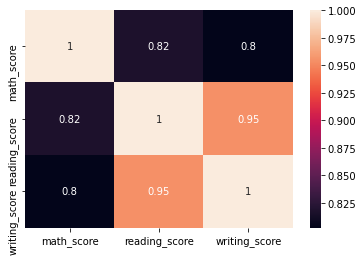

In [17]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

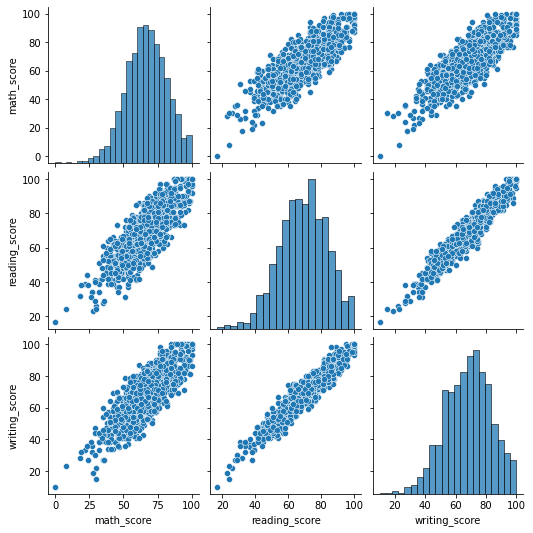

In [18]:
sns.pairplot(data)

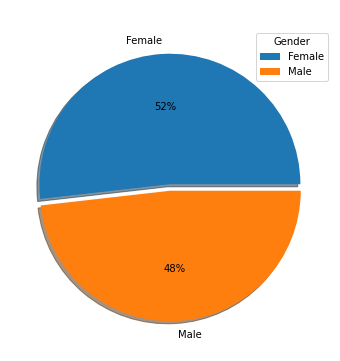

In [41]:
num=data["gender"].value_counts()
plt.figure(figsize=(10,6))
mylabels=["Female","Male"]
myexplode = [0.05, 0]
plt.title("COUNT OF GENDER",fontsize=20, color='w')
plt.pie(num,labels=mylabels,autopct='%1.0f%%', explode = myexplode, shadow = True)
plt.legend(title="Gender")
plt.show()

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



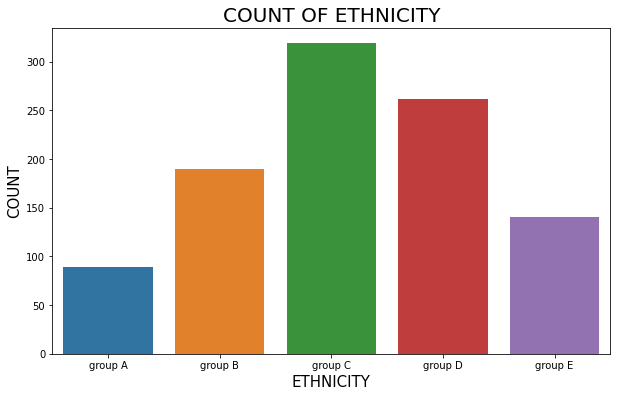

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(sorted(data["ethnicity"]))
plt.title("COUNT OF ETHNICITY",fontsize=20)
plt.xlabel("ETHNICITY",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()

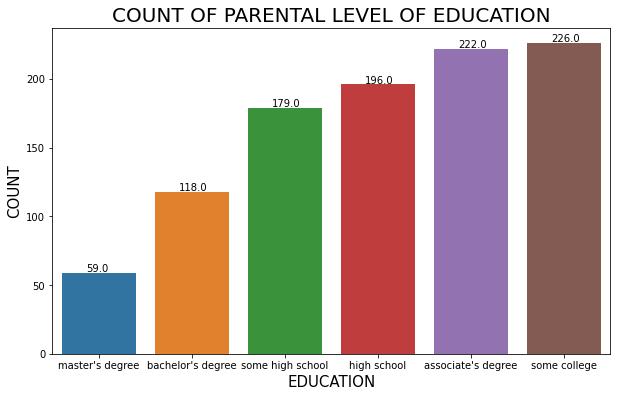

In [132]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'parent_education',
              data = data,
              order = data['parent_education'].value_counts(ascending=True).index)
for p in ax.patches:
       ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.26, p.get_height()+1))
#for p in ax.patches:
    #ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.6, p.get_height()+10), ha='center', va='top', color='white', size=18)
plt.title("COUNT OF PARENTAL LEVEL OF EDUCATION",fontsize=20)
plt.xlabel("EDUCATION",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            1000 non-null   object
 1   ethnicity         1000 non-null   object
 2   parent_education  1000 non-null   object
 3   lunch             1000 non-null   object
 4   test_prep_course  1000 non-null   object
 5   math_score        1000 non-null   int64 
 6   reading_score     1000 non-null   int64 
 7   writing_score     1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


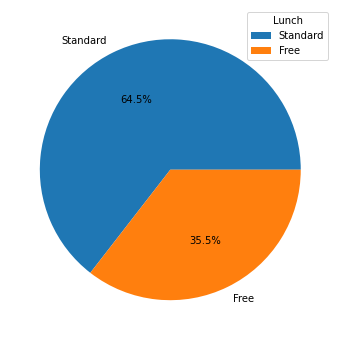

In [139]:
plt.figure(figsize=(10,6))

num=data["lunch"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(num,labels=["Standard","Free"],autopct='%1.1f%%')
plt.legend(title='Lunch')
plt.show()

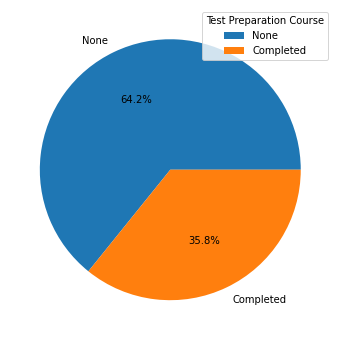

In [147]:
num=data["test_prep_course"].value_counts()
plt.figure(figsize=(10,6))
plt.pie(num,labels=["None","Completed"],autopct='%1.1f%%')
plt.legend(title='Test Preparation Course')
plt.show()

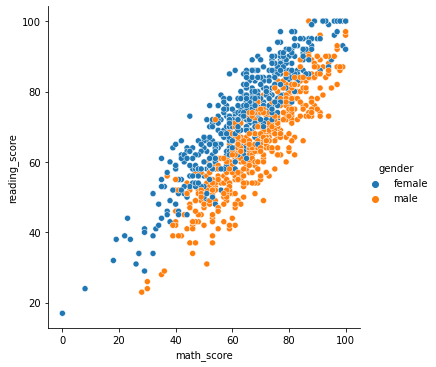

In [19]:
sns.relplot(x='math_score', y='reading_score', hue='gender', data=data)

<AxesSubplot:xlabel='math_score', ylabel='writing_score'>

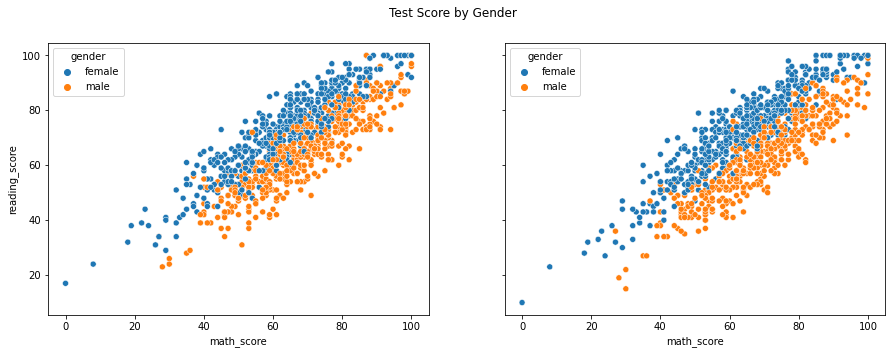

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Test Score by Gender')

sns.scatterplot(ax=axes[0], x='math_score', y='reading_score', hue='gender', data=data)
sns.scatterplot(ax=axes[1], x='math_score', y='writing_score', hue='gender', data=data)

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

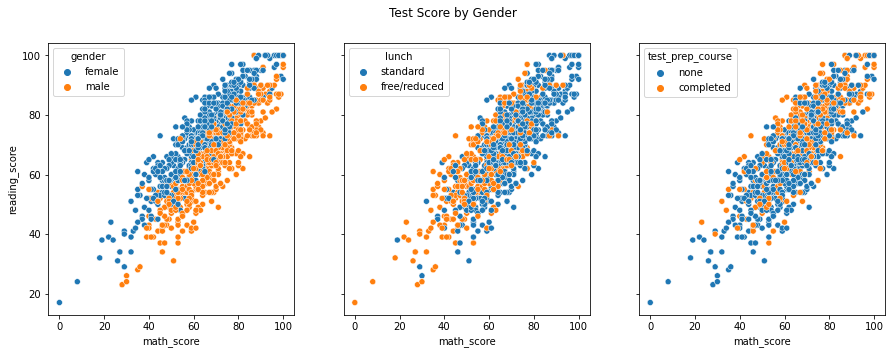

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Test Score by Gender')

sns.scatterplot(ax=axes[0], x='math_score', y='reading_score', hue='gender', data=data)
sns.scatterplot(ax=axes[1], x='math_score', y='reading_score', hue='lunch', data=data)
sns.scatterplot(ax=axes[2], x='math_score', y='reading_score', hue='test_prep_course', data=data)

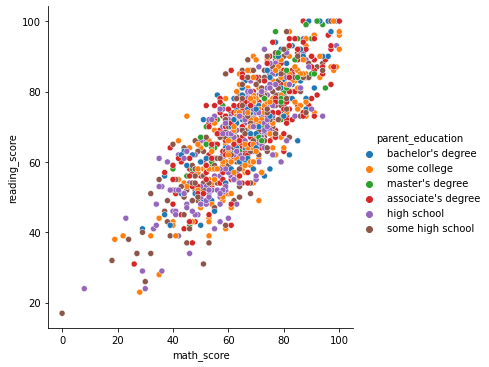

In [22]:
sns.relplot(x='math_score', y='reading_score', hue='parent_education', data=data)

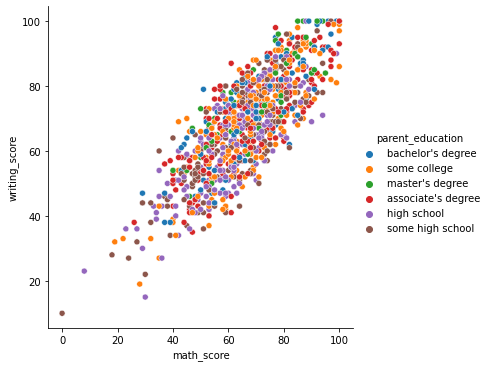

In [23]:
sns.relplot(x='math_score', y='writing_score', hue='parent_education', data=data)

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

<AxesSubplot:xlabel='writing_score', ylabel='Density'>

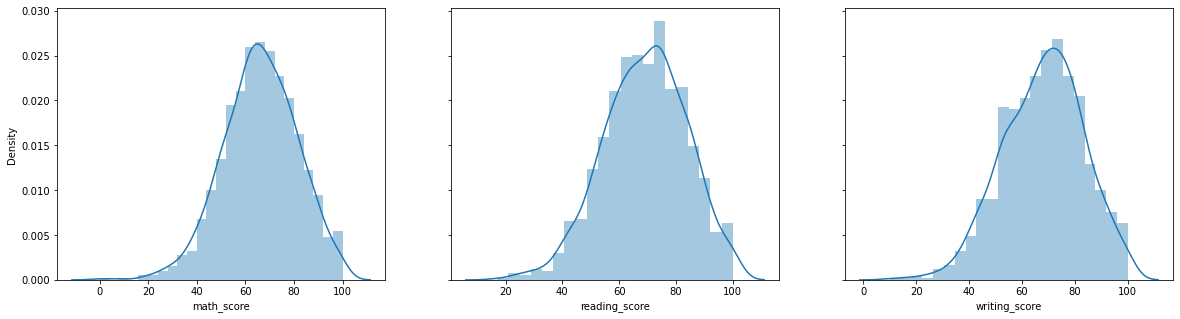

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
sns.distplot(data['math_score'], ax=axes[0])
sns.distplot(data['reading_score'], ax=axes[1])
sns.distplot(data['writing_score'], ax=axes[2])

<AxesSubplot:xlabel='writing_score'>

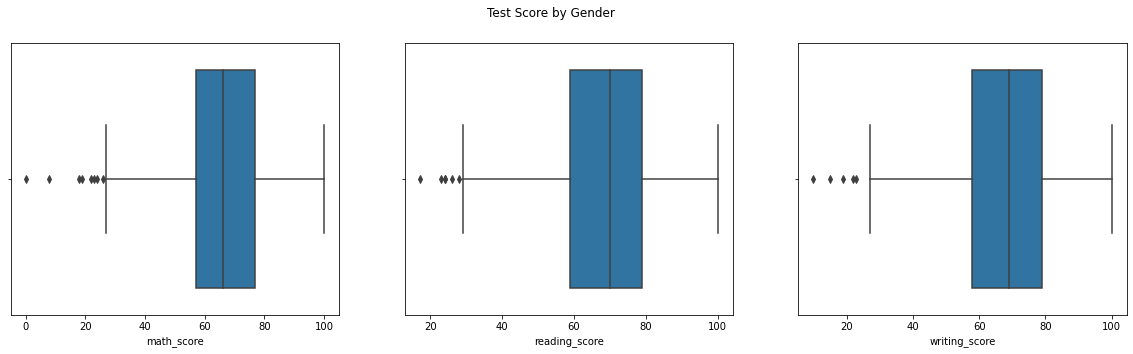

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Test Score by Gender')

sns.boxplot(ax=axes[0], x='math_score', data= data)
sns.boxplot(ax=axes[1], x='reading_score', data= data)
sns.boxplot(ax=axes[2], x='writing_score', data= data)

In [167]:
fig1 = data.groupby('lunch').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig1, barmode='group',title = "<b>Chart Showing Relationship Between Lunch and Scores</b>")


In [26]:
fig1 = data.groupby('parent_education').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig1, barmode='group',title = "<b>Chart Showing Relationship Between Lunch and Scores</b>")

In [209]:
par_meal = data.groupby(['parent_education','lunch']).size().reset_index().rename(columns={0:'count'})
par_meal.head(10)

fig = px.bar(par_meal, x="parent_education", y="count", color="lunch", title="Long-Form Input")
fig.show()
#ValueError: Plotly Express cannot process wide-form data with columns of different type.

In [213]:
fig = px.bar(par_meal, x="parent_education", y="count",
             color='lunch', barmode='group',
             height=400)
fig.show()

In [190]:
fig2 = data.groupby('test_prep_course').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig2, barmode='group',title = "<b>Chart Showing Relationship Between Test Preparation and Scores</b>")

In [215]:
fig3 = data.groupby('gender').agg({'math_score' : 'mean','reading_score' : 'mean','writing_score' : 'mean'})
px.bar(data_frame=fig3, barmode='group',title = "<b>Chart Showing Relationship Between Gender and Scores</b>")

In [219]:
#Model Building

# Defining regressand(Y) and regressors(X)

X=data[['gender','ethnicity','parent_education','lunch','test_prep_course','math_score','writing_score']]
Y=data['reading_score']

#Creating dummy variables for categorical variables using inbuilt function from Pandas

X = pd.get_dummies(data=X, drop_first=True)
X.head()

,math_score,writing_score,gender_male,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_education_bachelor's degree,parent_education_high school,parent_education_master's degree,parent_education_some college,parent_education_some high school,lunch_standard,test_prep_course_none
0,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,75,1,0,1,0,0,0,0,0,1,0,1,1


In [220]:
#Splitting the dataset for training(80%) and testing(20%)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 14)
(200, 14)
(800,)
(200,)


Random Tree Regressor

Regression is a statistical method for determining the relationship between two or more variables. It can infer how the result varies for various factors. It involves predicting a numeric value given any input.

It is a classification and regression algorithm. Ensemble Learning (bagging) is used for Regression. It combines predictions from multiple machine learning algorithms to make a more accurate prediction. The algorithm works by creating a random number of decision trees and merging them to get a stable and accurate prediction. Because there is no interaction between the trees in a random forest, the more trees used, the more robust the prediction.

However, there are drawbacks: no interpretability, overfitting is easy, and we must choose the number of trees to model.

In [222]:
#Random Tree Regressor

#Creating Random Forest Regression model

from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(n_estimators =40, random_state = 0)
forest.fit(X_train,y_train)  
y_pred = forest.predict(X_test)

#Accuracy score of the Random Forest Regression model
print("Random Forest Regression score : ",forest.score(X_test,y_test))


Random Forest Regression score :  0.8928347329467152


Linear Regression

The standard regression algorithm assumes a linear relationship between the inputs and the target variable. Linear Regression Assumptions The following linear regression assumptions have been tested for this problem:

Linearity: This assumes that the predictors and response variables are linear. This is a critical assumption that can lead to incorrect predictions. A scatter plot is used to compare the actual and predicted values.

Error Term Normality:  This assumes the regression model's error terms are normally distributed. Breaking this assumption leads to faulty confidence intervals.

No Regressor Multicollinearity:  This assumes that the regression predictors are uncorrelated. Multicollinearity skews regression coefficients.

No Error Autocorrelation:  This assumes the error terms aren't highly correlated. Positive or negative correlation may affect model estimates.

Homoscedasticity: This assumes the error terms are homogeneous.

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



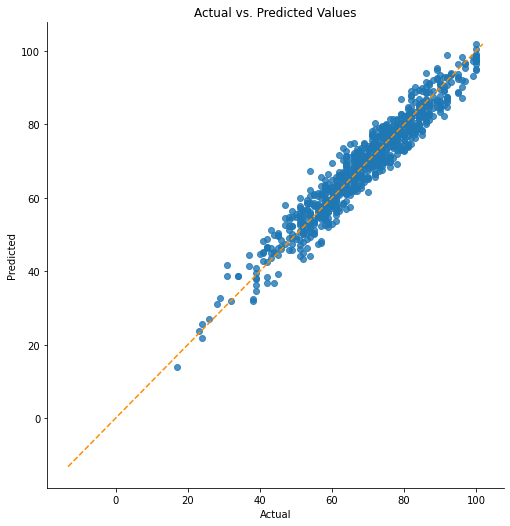

In [238]:
#Creating linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

# Linearity Assumption
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    data_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    data_results['Residuals'] = abs(data_results['Actual']) - abs(data_results['Predicted'])
    return data_results

def linear_assumption(model, features, label):
    data_results = calculate_residuals(model, features, label)
    sns.lmplot(x='Actual', y='Predicted', data=data_results, fit_reg=False, size=7)
    line_coords = np.arange(data_results.min().min(), data_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted Values')
    plt.show()

linear_assumption(model,X_train,y_train)

A scatter plot compares actual and predicted values. On the plot, the points mostly follow the diagonal line. The variables are related linearly.

Using the Anderson-Darling test for Normal Distribution
p-value from the test:  0.06944879318655102
Since p-value greater than 0.05, Residuals are normally distributed.


C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



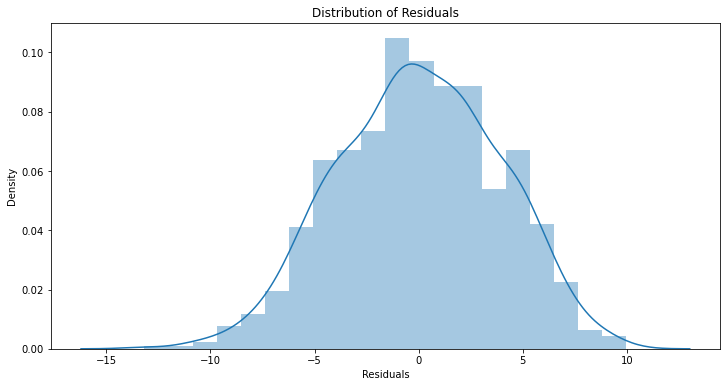

In [232]:
# The error terms are normally distributed

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    from statsmodels.stats.diagnostic import normal_ad    
    data_results = calculate_residuals(model, features, label)
    print('Using the Anderson-Darling test for Normal Distribution')
    p_value = normal_ad(data_results['Residuals'])[1]
    print('p-value from the test: ', p_value)
    if p_value < p_value_thresh:
        print('Since p-value less than 0.05, Residuals are not normally distributed.')
    else:
        print('Since p-value greater than 0.05, Residuals are normally distributed.')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(data_results['Residuals'])
    plt.show()
        
normal_errors_assumption(model,X_train,y_train)

The Anderson-Darling p-value is found by plotting the histogram. The assumption holds because the p-value exceeds the significance level. The residuals have a bell-shaped normal curve. So the residuals are normal.

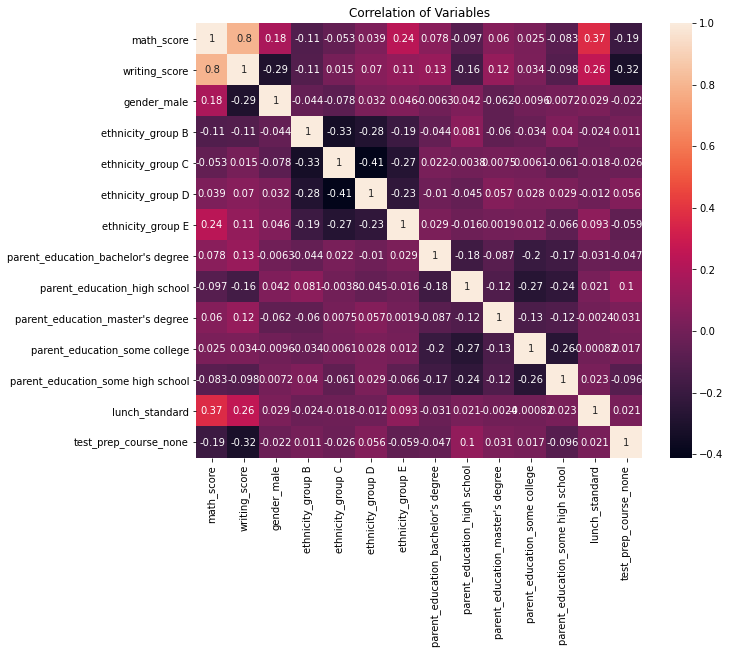

In [233]:
# No Multicollinearity among Predictors

def multicollinearity_assumption(model, features, label, feature_names=None):        
    
    # Plotting the heatmap
    plt.figure(figsize = (10,8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()
    
multicollinearity_assumption(model,X_train,y_train)

To test for multicollinearity, the correlation heatmap was used. On the map, nearly all variables have low correlation. Only reading and writing scores are highly correlated. This correlation is allowed because both variables are studied.

In [237]:
# No Autocorrelation of the Error Terms

from statsmodels.stats.stattools import durbin_watson #Using Durbin-Watson test
data_results = calculate_residuals(model,X_train,y_train)
durbin_watson(data_results['Residuals'])

1.9577661932903143

The Durbin-Watson test measures error term autocorrelation. Error terms have little or no autocorrelation when the Durbin-Watson test statistic is 1.5 or 2.5.

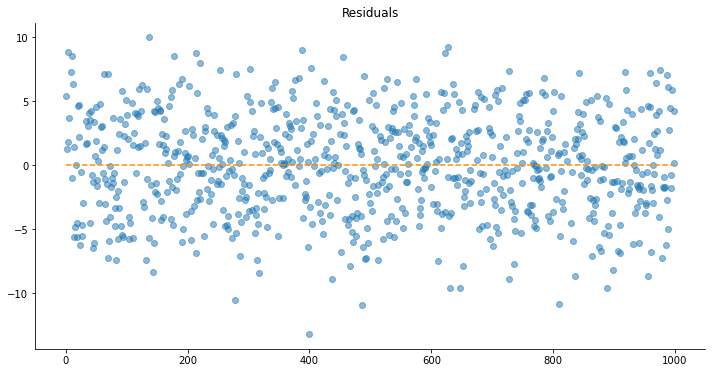

In [236]:
# Homoscedasticity

data_results = calculate_residuals(model,X_train,y_train)
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)
plt.scatter(x=data_results.index, y=data_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, data_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  
ax.spines['top'].set_visible(False)  
plt.title('Residuals')
plt.show()

The residua are plotted. The residual plot shows a random distribution of residual terms. As a result, the residuals are homoscedastic.

                            OLS Regression Results                            
Dep. Variable:          reading_score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     743.9
Date:                Thu, 13 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:45:00   Log-Likelihood:                -2217.0
No. Observations:                 800   AIC:                             4464.
Df Residuals:                     785   BIC:                             4534.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

C:\Users\olowe_m\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



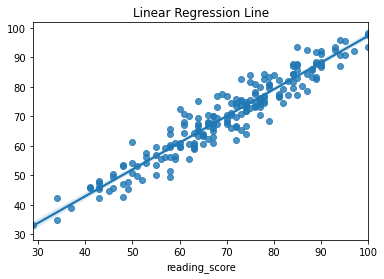

In [241]:
#Display regression results

import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

print("Linear Regression score : ",model.score(X_train,y_train))
#Mean Square Error

from sklearn.metrics import mean_squared_error
predictions = model.predict(X_test)
print("Mean Square Error: ",mean_squared_error(y_test,predictions))

#Linear Regression Line

predictions = model.predict(X_test)
sns.regplot(y_test,predictions)
plt.title("Linear Regression Line")
plt.show()

The linear regression table is displayed. The table gives a summary of the regression results. The regression coefficients give the relationship between the dependent variable, writing score, with each of the independent variables. Using the coefficient values, the regression line can be estimated.
From the adjusted R-squared, the obtained regression model is a 93% fit for the data, indicating the regression model is a good fit.

Regularization
When we talk about regression, the terms linear regression and logistic regression are frequently used. Lasso regression, Ridge regression, Polynomial regression, Stepwise regression, and Elastic net regression are examples of other types of regression.

In linear regression, a loss function known as the sum of squares is used to fit the model, and the coefficients in the equation are chosen to reduce the loss function to a minimum value. However, if there is a lot of irrelevant data in the training set, the wrong coefficients may be chosen, which will not work well for future predictions. Regularization can be used to shrink or regularise the incorrectly calculated coefficients.

The "penalty" term is added to the best-fit equation generated by the trained data to perform regularisation. This technique can be used to reduce the number of variables in the model while still keeping them in the model. It also addresses the issue of overfitting, which results in poor model accuracy. When the model learns both the data and the noise in the training set, this happens. Bias and variance are two key terms used in conjunction with Lasso and Ridge regression. Bias is defined as a machine learning model's inability to produce a plot that is consistent with the samples but fails to capture the relationship. Variance refers to how a model's accuracy varies across different datasets.

Lasso Regression

LASSO is an acronym for Least Absolute Shrinkage and Selection. To identify variables strongly associated with the target variable, the shrinkage technique is used. When using Lasso Regression, a penalty equal to the absolute magnitude of the coefficient is added as part of the regularisation process. Some coefficients may become zero and be eliminated from the model as a result of this regularisation. This may reduce features. In lasso regression, the least-squares is penalised. By reducing the loss function, it becomes easier to select the best model.

D = least-squares + λ* (sum of absolute values of the magnitude of the coefficients) where λ denotes the amount of shrinkage which can be of any value between 0 and infinity.


If λ = 0 it implies that all features are considered and it is equivalent to the linear regression where only the residual sum of squares is considered to build a predictive model.


If λ = ∞ it implies that no feature is considered i.e, as λ closes to infinity it eliminates more and more features.

Lasso penalises coefficient absolute values. Coefficients decrease as lambda increases, eventually reaching 0 (see graph). Lattice regression removes unimportant variables from our model this way. As such, Lasso regression seeks to optimise the cost function by reducing the coefficients' absolute values. It has a higher bias than linear regression, but less variance in future predictions.

In [244]:
#Creating Lasso Regression model

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ls = Lasso()
ls.fit(X_train, y_train)
y_pred = ls.predict(X_test)

#Accuracy score of the Lasso Regression model
print("Lasso regression score : ", ls.score(X_test, y_test))

#Mean Square Error
print("Mean Square Error: ",mean_squared_error(y_test,y_pred))

Lasso regression score :  0.9075845287223708
Mean Square Error:  19.52761087809412


Ridge Regression 
Ridge Regression uses L2 regularization technique where a penalty is added which is equal to the square of the magnitude of the coefficient.

Minimization Objective = RSS + λ * (sum of square of coefficients)

Higher the values of alpha, bigger is the penalty and therefore the magnitude of coefficients is reduced.

If λ = 0, then we will get the same coefficients as Linear Regression.

If λ = ∞, then the coefficients will be zero because infinite weightage on squares of coefficients which is less than zero makes the objective infinite. If 0 < λ < ∞ then, the coefficients will be between 0 and 1 for Linear regression as the magnitude of λ decides the weightage given to the objective. As λ increases the variance decreases but the bias increases.

In [245]:
#Creating Ridge Regression model

rd = Ridge()
rd.fit(X_train,y_train)
y_pred = rd.predict(X_test)

#Accuracy score of the Ridge Regression model
print("Ridge regression score : ", rd.score(X_test, y_test))

#Mean Square Error
print("Mean Square Error: ",mean_squared_error(y_test,y_pred))

Ridge regression score :  0.9117598205416355
Mean Square Error:  18.645361695983105


In [246]:
print("Random Forest Regression score : ",forest.score(X_test,y_test))
print("Linear Regression score : ",model.score(X_train,y_train))
print("Lasso regression score : ", ls.score(X_test, y_test))
print("Ridge regression score : ", rd.score(X_test, y_test))

Random Forest Regression score :  0.8928347329467152
Linear Regression score :  0.9299112510751849
Lasso regression score :  0.9075845287223708
Ridge regression score :  0.9117598205416355


CONCLUSION

The Linear Regression model has the highest accuracy score of the four regression models built. As a result, this model can be used to predict students' reading scores with the greatest accuracy. Using these values, the educational institution can analyse the factors that have the greatest impact on students' education and take the necessary steps to improve their results.